0


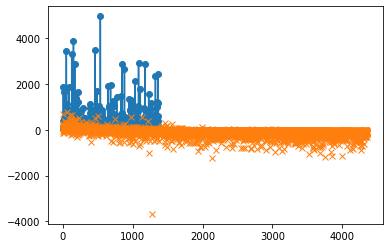

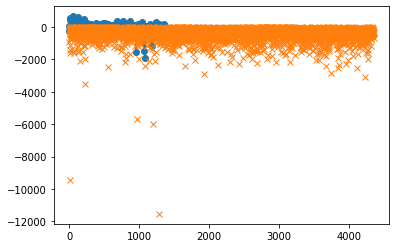

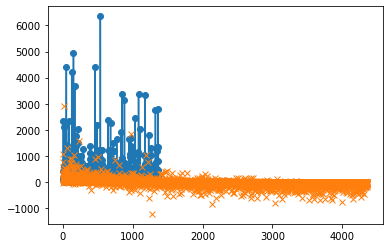

In [1]:
import pandas as pd
import re
import nltk
from nltk import bigrams, trigrams
from collections import Counter, defaultdict
# reading csv file
data = pd.read_csv("text_dataset.csv")
numSpam = 0
for a in range(0,5728):
    value = data.loc(0)[a]['spam']
    if value == 1:
        numSpam = numSpam + 1
prior_spam = numSpam/len(data)

prior_spam

# Create a placeholder for model
model = defaultdict(lambda: defaultdict(lambda: 0))

# Count frequency of co-occurance  
for a in range(0,5728):
    parahgraph = data.loc(0)[a]['text']
    sentences = re.split(", | . | : | ;",parahgraph)
    numSentences = len(sentences)
    for j in range(0,numSentences):
        array = sentences[j].split(" ")
        length = len(array)
        extra = []
        for k in range(0,length):
            if len(array[k])==0:
                extra.append(k)
        count = 0
        for n in extra:
            array.pop(n-count)
            count += 1
            length -= 1
        if(length >= 3):
            for i in range(0,length-2):
                model[(array[i],array[i+1])][array[i+2]] += 1
 



# Create a placeholder for spam model
model_spam = defaultdict(lambda: defaultdict(lambda: 0))

# Count frequency of co-occurance  
for a in range(0,5728):
    m = data.loc(0)[a]['spam']
    if m == 1:
        parahgraph = data.loc(0)[a]['text']
        sentences = re.split(", | . | : | ;",parahgraph)
        numSentences = len(sentences)
        for j in range(0,numSentences):
            array = sentences[j].split(" ")
            length = len(array)
            extra = []
            for k in range(0,length):
                if len(array[k])==0:
                    extra.append(k)
            count = 0
            for n in extra:
                array.pop(n-count)
                count += 1
                length -= 1 
            if(length >= 3):
                for i in range(0,length-2):
                    model_spam[(array[i],array[i+1])][array[i+2]] += 1

len(model_spam)
print(model_spam["you","pop"]["good"])

import numpy as np
def likelihood(text, model):
    p = 0
    num = 0
    size = len(model)
    array = text.split(" ")
    length = len(array)
    extra = []
    for k in range(0,length):
        if len(array[k])==0:
            extra.append(k)
    count = 0
    for n in extra:
        array.pop(n-count)
        count += 1
        length -= 1
    if(length >= 3):
        for i in range(0,length-2):
            if model[(array[i],array[i+1])][array[i+2]] == 0:
                num += 1
        for j in range(0,length-2):
            if model[(array[j],array[j+1])][array[j+2]] == 0:
                p += np.log(1/(size+num))
            else:
                p += np.log(model[(array[j],array[j+1])][array[j+2]]/(size+num))
    return p
                        

p = 1
spam = []
ham = []
new_data = []
for a in range(0,5728):
    parahgraph = data.loc(0)[a]['text']
    p = (likelihood(parahgraph,model_spam)+np.log(prior_spam))-likelihood(parahgraph,model)
    label = data.loc(0)[a]['spam']
    ele = [parahgraph, label, p]
    new_data.append(ele)
    if data.loc(0)[a]['spam']==1:
        spam.append(int(p))
    else:
        ham.append(int(p))
#     print(p,data.loc(0)[a]['spam'])

spam

import matplotlib.pyplot as plt
plt.plot(spam[:], marker='o')
plt.plot(ham[:],'x', mfc='r')
plt.show()


df = pd.DataFrame(new_data)

df.to_csv('processed_email.csv', index=False, na_rep='Unknown')

# Create a placeholder for model
model_bigram = defaultdict(lambda: defaultdict(lambda: 0))

# Count frequency of co-occurance  
for a in range(0,5728):
    parahgraph = data.loc(0)[a]['text']
    sentences = re.split(", | . | : | ;",parahgraph)
    numSentences = len(sentences)
    for j in range(0,numSentences):
        array = sentences[j].split(" ")
        length = len(array)
        extra = []
        for k in range(0,length):
            if len(array[k])==0:
                extra.append(k)
        count = 0
        for n in extra:
            array.pop(n-count)
            count += 1
            length -= 1  
        if(length >= 2):
            for i in range(0,length-1):
                model_bigram[array[i]][array[i+1]] += 1


# Create a placeholder for model
model_spam_bigram = defaultdict(lambda: defaultdict(lambda: 0))

# Count frequency of co-occurance  
for a in range(0,5728):
    m = data.loc(0)[a]['spam']
    if m == 1:
        parahgraph = data.loc(0)[a]['text']
        sentences = re.split(", | . | : | ;",parahgraph)
        numSentences = len(sentences)
        for j in range(0,numSentences):
            array = sentences[j].split(" ")
            length = len(array)
            extra = []
            for k in range(0,length):
                if len(array[k])==0:
                    extra.append(k)
            count = 0
            for n in extra:
                array.pop(n-count)
                count += 1
                length -= 1
            if(length >= 3):
                for i in range(0,length-1):
                    model_spam_bigram[array[i]][array[i+1]] += 1

import numpy as np
def likelihood_bigram(text, model):
    p = 0
    num = 0
    size = len(model)
    array = text.split(" ")
#         print(array)
    length = len(array)
    extra = []
    for k in range(0,length):
        if len(array[k])==0:
            extra.append(k)
#             else re.search('*[_ | 0-9]*'):
#                 extra.append(k)
    count = 0
    for n in extra:
        array.pop(n-count)
        count += 1
        length -= 1
#     print(size, length)
    if(length >= 3):
        for i in range(0,length-1):
            if model[array[i]][array[i+1]] == 0:
                     num += 1
                
        for j in range(0,length-1):
            if model[array[j]][array[j+1]] == 0:
#                 print(p)
                p += np.log(1/(size+num))
            else:
#                 print(p)
                p += np.log(model[array[j]][array[j+1]]/(size+num))
#     print(p)
    return p
                 

p = 1
spam = []
ham = []
new_data = []
for a in range(0,5728):
    parahgraph = data.loc(0)[a]['text']
    p = (likelihood_bigram(parahgraph,model_spam_bigram)+np.log(prior_spam))-likelihood_bigram(parahgraph,model_bigram)
    label = data.loc(0)[a]['spam']
    ele = [parahgraph, label, p]
    new_data.append(ele)
    if data.loc(0)[a]['spam']==1:
        spam.append(int(p))
    else:
        ham.append(int(p))
#     print(p,data.loc(0)[a]['spam'])

spam

import matplotlib.pyplot as plt
plt.plot(spam[:], marker='o')
plt.plot(ham[:],'x', mfc='r')
plt.show()

# Create a placeholder for quadgram_model
model_quadgram = defaultdict(lambda: defaultdict(lambda: 0))

# Count frequency of co-occurance  
for a in range(0,5728):
    parahgraph = data.loc(0)[a]['text']
    sentences = re.split(", | . | : | ;",parahgraph)
    numSentences = len(sentences)
    for j in range(0,numSentences):
        array = sentences[j].split(" ")
        length = len(array)
        extra = []
        for k in range(0,length):
            if len(array[k])==0:
                extra.append(k)
        count = 0
        for n in extra:
            array.pop(n-count)
            count += 1
            length -= 1  
        if(length >= 4):
            for i in range(0,length-3):
                model_quadgram[(array[i],array[i+1],array[i+2])][array[i+3]] += 1
 

# Create a placeholder for quadgram_model
model_spam_quadgram = defaultdict(lambda: defaultdict(lambda: 0))

# Count frequency of co-occurance  
for a in range(0,5728):
    m = data.loc(0)[a]['spam']
    if m == 1:
        parahgraph = data.loc(0)[a]['text']
        sentences = re.split(", | . | : | ;",parahgraph)
        numSentences = len(sentences)
        for j in range(0,numSentences):
            array = sentences[j].split(" ")
            length = len(array)
            extra = []
            for k in range(0,length):
                if len(array[k])==0:
                    extra.append(k)
            count = 0
            for n in extra:
                array.pop(n-count)
                count += 1
                length -= 1   
            if(length >= 4):
                for i in range(0,length-3):
                    model_spam_quadgram[(array[i],array[i+1],array[i+2])][array[i+3]] += 1


import numpy as np
def likelihood_quadgram(text, model):
    p = 0
    num = 0
    size = len(model)
    array = text.split(" ")
    length = len(array)
    extra = []
    for k in range(0,length):
        if len(array[k])==0:
            extra.append(k)
    count = 0
    for n in extra:
        array.pop(n-count)
        count += 1
        length -= 1
    if(length >= 4):
        for i in range(0,length-3):
            if model[(array[i],array[i+1],array[i+2])][array[i+3]] == 0:
                     num += 1
                
        for j in range(0,length-3):
            if model[(array[j],array[j+1],array[j+2])][array[j+3]] == 0:
                p += np.log(1/(size+num))
            else:
                p += np.log(model[(array[j],array[j+1],array[j+2])][array[j+3]]/(size+num))
    return p

p = 1
spam = []
ham = []
new_data = []
for a in range(0,5728):
    parahgraph = data.loc(0)[a]['text']
    p = (likelihood_quadgram(parahgraph,model_spam_quadgram)+np.log(prior_spam))-likelihood_quadgram(parahgraph,model_quadgram)
    label = data.loc(0)[a]['spam']
    ele = [parahgraph, label, p]
    new_data.append(ele)
    if data.loc(0)[a]['spam']==1:
        spam.append(int(p))
    else:
        ham.append(int(p))
        
import matplotlib.pyplot as plt
plt.plot(spam[:], marker='o')
plt.plot(ham[:],'x', mfc='r')
plt.show()

df = pd.DataFrame(new_data)

df.to_csv('processed_email_quadgram.csv', index=False, na_rep='Unknown')





